In [1]:
import pandas as pd

df = pd.read_csv('processed_disney.csv', index_col=0)

# Topic modelling

This well help identify strengths and pain points mentioned in visitors' reviews.

In [2]:
import nltk
from nltk import ne_chunk
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\zoe\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\zoe\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\zoe\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

Get most frequently occuring words and remove before performing topic modelling

In [3]:
from nltk import FreqDist
from nltk.tokenize import word_tokenize
all_words = ' '.join(df['words_review'])

all_words_frequency = FreqDist(word_tokenize(all_words))


In [4]:
# most frequently occurring words
frequent_dict_keys = dict(all_words_frequency.most_common(50)).keys()
list_freq_keys = list(frequent_dict_keys)
list_freq_keys

['ride',
 'park',
 'disneyland',
 'time',
 'not',
 'get',
 'disney',
 'day',
 'line',
 'place',
 'one',
 'pas',
 'people',
 'like',
 'wait',
 'year',
 'food',
 'would',
 'kid',
 'experience',
 'even',
 'hour',
 'ticket',
 'back',
 'fast',
 'make',
 'long',
 'love',
 'really',
 'great',
 'much',
 'family',
 'many',
 'fun',
 'went',
 'also',
 'going',
 'got',
 'money',
 'see',
 'way',
 'first',
 'good',
 'minute',
 'visit',
 'lot',
 'always',
 'take',
 'come',
 'star']

Create part-of-speech tagging function

In [5]:
def tagPOS(text):
    tagged_text = []
    
#     remove top 25 occuring words
    for i in text:
        if i not in list_freq_keys:
            tagged_text.append(i)

        #  Using a Tagger. Which is part-of-speech tagger or POS-tagger.  
    tagged_text = nltk.pos_tag(tagged_text) 

    return tagged_text

### Perform topic modelling seperately on positive and negative reviews 

In [6]:
# dataframe of positive reviews
dfpos = df[df['sentiment']=='positive']
dfpos['list_words'] = dfpos['words_review'].apply(lambda x: x.split())
dfpos['POS_txt'] = dfpos['list_words'].apply(lambda x: tagPOS(x))
dfpos.head()

C:\Users\zoe\AppData\Local\Temp/ipykernel_35656/1455964061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpos['list_words'] = dfpos['words_review'].apply(lambda x: x.split())
C:\Users\zoe\AppData\Local\Temp/ipykernel_35656/1455964061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpos['POS_txt'] = dfpos['list_words'].apply(lambda x: tagPOS(x))


,review,rating,date_posted,year,month,sentiment,words_review,list_words,POS_txt
0,the happiest place on earth how can anyone r...,5,2006-05,2006,May,positive,happiest place earth anyone resist place child...,"[happiest, place, earth, anyone, resist, place...","[(happiest, JJS), (earth, NN), (anyone, NN), (..."
1,its walt disneyland s 50th anniversary and it...,5,2006-07,2006,July,positive,walt disneyland anniversary still happiest pla...,"[walt, disneyland, anniversary, still, happies...","[(walt, NN), (anniversary, NN), (still, RB), (..."
2,some info and advice for disney goers new and...,4,2006-10,2006,October,positive,info advice disney goer new old mediocre meal ...,"[info, advice, disney, goer, new, old, mediocr...","[(info, JJ), (advice, NN), (goer, VBD), (new, ..."
3,you got to hate and love this place at the sam...,5,2007-05,2007,May,positive,got hate love place time hate people one crowd...,"[got, hate, love, place, time, hate, people, o...","[(hate, NN), (hate, NN), (crowd, NN), (blame, ..."
4,announcer dude hey ian this is your 300th re...,5,2007-06,2007,June,positive,announcer dude hey ian review gon ian going re...,"[announcer, dude, hey, ian, review, gon, ian, ...","[(announcer, NN), (dude, NN), (hey, NN), (ian,..."


In [7]:
# dataframe of negative reviews
dfneg = df[df['sentiment']=='negative']
dfneg['list_words'] = dfneg['words_review'].apply(lambda x: x.split())
dfneg['POS_txt'] = dfneg['list_words'].apply(lambda x: tagPOS(x))
dfneg.head()

C:\Users\zoe\AppData\Local\Temp/ipykernel_35656/1405629338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfneg['list_words'] = dfneg['words_review'].apply(lambda x: x.split())
C:\Users\zoe\AppData\Local\Temp/ipykernel_35656/1405629338.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfneg['POS_txt'] = dfneg['list_words'].apply(lambda x: tagPOS(x))


,review,rating,date_posted,year,month,sentiment,words_review,list_words,POS_txt
49,i feel like a total a hole because everyone el...,2,2010-03,2010,March,negative,feel like total hole everyone else putting sta...,"[feel, like, total, hole, everyone, else, putt...","[(feel, VB), (total, JJ), (hole, NN), (everyon..."
111,yes i am the soulless biz natch that two star...,2,2011-10,2011,October,negative,yes soulless biz natch two star disneyland not...,"[yes, soulless, biz, natch, two, star, disneyl...","[(yes, RB), (soulless, JJ), (biz, NN), (natch,..."
121,i know i know a review on disneyland what...,2,2011-11,2011,November,negative,know know review disneyland cliche right situa...,"[know, know, review, disneyland, cliche, right...","[(know, NNS), (know, VBP), (review, VBP), (cli..."
129,combine one part waking up the wrong side of t...,2,2012-02,2012,February,negative,combine one part waking wrong side bed one par...,"[combine, one, part, waking, wrong, side, bed,...","[(combine, JJ), (part, NN), (waking, VBG), (wr..."
170,don t get me wrong i love disneyland the r...,2,2012-10,2012,October,negative,get wrong love disneyland ride cute take back ...,"[get, wrong, love, disneyland, ride, cute, tak...","[(wrong, JJ), (cute, JJ), (thing, NN), (simple..."


Function to identify named entities from POS tagged words

In [8]:
import re

exclude = ['DATE','TIME','PERCENT','MONEY','QUANTITY','ORDINAL','CARDINAL']

def NERchunk(tagged):
    allner = []
    for text in tagged:
        nerlist = []
        res_chunk = ne_chunk(text)
        
        for x in str(res_chunk).split('\n'):

            if '(S' not in x and re.search('[A-Z]+', x) != None:
                entity = re.search('[A-Z]+', x).group()

                if entity not in exclude:
                    nerlist.append(x)
    #                   only excluded named entities in 'exclude'. include other named entities and 'NNP' terms.

        allner.append(nerlist)
    return allner

In [9]:
# Perform NER on positive dataset
postagged = NERchunk(dfpos['POS_txt'])
dfpos.head()

,review,rating,date_posted,year,month,sentiment,words_review,list_words,POS_txt
0,the happiest place on earth how can anyone r...,5,2006-05,2006,May,positive,happiest place earth anyone resist place child...,"[happiest, place, earth, anyone, resist, place...","[(happiest, JJS), (earth, NN), (anyone, NN), (..."
1,its walt disneyland s 50th anniversary and it...,5,2006-07,2006,July,positive,walt disneyland anniversary still happiest pla...,"[walt, disneyland, anniversary, still, happies...","[(walt, NN), (anniversary, NN), (still, RB), (..."
2,some info and advice for disney goers new and...,4,2006-10,2006,October,positive,info advice disney goer new old mediocre meal ...,"[info, advice, disney, goer, new, old, mediocr...","[(info, JJ), (advice, NN), (goer, VBD), (new, ..."
3,you got to hate and love this place at the sam...,5,2007-05,2007,May,positive,got hate love place time hate people one crowd...,"[got, hate, love, place, time, hate, people, o...","[(hate, NN), (hate, NN), (crowd, NN), (blame, ..."
4,announcer dude hey ian this is your 300th re...,5,2007-06,2007,June,positive,announcer dude hey ian review gon ian going re...,"[announcer, dude, hey, ian, review, gon, ian, ...","[(announcer, NN), (dude, NN), (hey, NN), (ian,..."


In [10]:
postagged[3]

['  hate/NN',
 '  hate/NN',
 '  crowd/NN',
 '  blame/VBP',
 '  everyone/NN',
 '  else/RB',
 '  around/IN',
 '  seem/VBP',
 '  every/DT',
 '  stroller/NN',
 '  magenetically/RB',
 '  pulled/VBD',
 '  towards/NNS',
 '  shin/JJ',
 '  every/DT',
 '  person/NN',
 '  walk/VBP',
 '  head/NN',
 '  side/NN',
 '  walk/VBP',
 '  look/NN',
 '  everything/NN',
 '  entry/NN',
 '  drink/NN',
 '  bathroom/NN',
 '  character/NN',
 '  photo/NN',
 '  return/NN',
 '  hand/NN',
 '  stamp/VBD',
 '  trying/VBG',
 '  exit/NN',
 '  firework/NN',
 '  show/NN',
 '  hurdled/VBD',
 '  cattle/NNS',
 '  want/VBP',
 '  seen/VBN',
 '  done/VBN',
 '  want/VBP',
 '  hope/NN',
 '  something/NN',
 '  may/MD',
 '  missed/VBN',
 '  though/IN',
 '  getting/VBG',
 '  break/JJ',
 '  wallet/NN',
 '  still/RB',
 '  need/VB',
 '  dole/JJ',
 '  pineapple/JJ',
 '  whip/NN',
 '  walk/NN',
 '  past/IN',
 '  booth/CC',
 '  everyone/NN',
 '  cup/NN',
 '  hand/NN',
 '  front/NN',
 '  tiki/NN',
 '  tiki/JJ',
 '  room/NN',
 '  soft/JJ',
 

In [11]:
# Perform NER on negative dataset
negtagged = NERchunk(dfneg['POS_txt'])
dfneg.head()

,review,rating,date_posted,year,month,sentiment,words_review,list_words,POS_txt
49,i feel like a total a hole because everyone el...,2,2010-03,2010,March,negative,feel like total hole everyone else putting sta...,"[feel, like, total, hole, everyone, else, putt...","[(feel, VB), (total, JJ), (hole, NN), (everyon..."
111,yes i am the soulless biz natch that two star...,2,2011-10,2011,October,negative,yes soulless biz natch two star disneyland not...,"[yes, soulless, biz, natch, two, star, disneyl...","[(yes, RB), (soulless, JJ), (biz, NN), (natch,..."
121,i know i know a review on disneyland what...,2,2011-11,2011,November,negative,know know review disneyland cliche right situa...,"[know, know, review, disneyland, cliche, right...","[(know, NNS), (know, VBP), (review, VBP), (cli..."
129,combine one part waking up the wrong side of t...,2,2012-02,2012,February,negative,combine one part waking wrong side bed one par...,"[combine, one, part, waking, wrong, side, bed,...","[(combine, JJ), (part, NN), (waking, VBG), (wr..."
170,don t get me wrong i love disneyland the r...,2,2012-10,2012,October,negative,get wrong love disneyland ride cute take back ...,"[get, wrong, love, disneyland, ride, cute, tak...","[(wrong, JJ), (cute, JJ), (thing, NN), (simple..."


### Using LDA model, identify topics in each sentiment dataset

In [12]:
import gensim
from gensim import corpora

from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

# plotting tools
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\zoe\AppData\Roaming\Python\Python39\site-packages\spacy\language.py:1895: UserWarning: [W123] Argument disable with value [] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(


In [13]:
seed = 40
Lda = gensim.models.ldamodel.LdaModel

#### Positive dataset

In [14]:

dictionary = corpora.Dictionary(postagged)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in postagged]

In [15]:
topic_num = 4

ldamodel = Lda(doc_term_matrix, num_topics = topic_num, id2word = dictionary, passes=25, random_state=seed)
print('Perplexity: ', ldamodel.log_perplexity(doc_term_matrix))

Perplexity:  -8.40714076912292


perplexity improved after removing top most occuring words in overall dataset

In [16]:
# visualize the topics and keywords
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary)
vis

C:\Users\zoe\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.136386 -0.000032       1        1  54.148113
0      0.100255 -0.027593       2        1  28.639874
1     -0.140429 -0.122767       3        1  10.884706
2     -0.096212  0.150392       4        1   6.327307, topic_info=               Term        Freq       Total Category  logprob  loglift
22      mountain/NN  861.000000  861.000000  Default  30.0000  30.0000
34         world/NN  949.000000  949.000000  Default  29.0000  29.0000
1771         war/NN  692.000000  692.000000  Default  28.0000  28.0000
27         space/NN  552.000000  552.000000  Default  27.0000  27.0000
51        jones/NNS  374.000000  374.000000  Default  26.0000  26.0000
...             ...         ...         ...      ...      ...      ...
929       loved/VBD   30.678294  281.359435   Topic4  -6.2306   0.5442
600      magical/JJ   32.959672  703.931872   Topic4  -6.1589  -0.3011
765        night/NN   31.474721  493.779654   Topic4  -6.2050   0.0074
162        took/VBD   28.619689  320.501007   Topic4  -6.3001   0.3445
468     amazing/VBG   28.765397  564.867593   Topic4  -6.2950  -0.2171

[351 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
467       1  0.652668     able/JJ
467       2  0.294370     able/JJ
467       3  0.019327     able/JJ
467       4  0.034194     able/JJ
1980      2  0.954764     add/VBP
...     ...       ...         ...
34        4  0.017901    world/NN
70        1  0.759221    worth/JJ
70        2  0.203781    worth/JJ
70        3  0.028854    worth/JJ
70        4  0.005410    worth/JJ

[715 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3])

From the visualization, the strengths are:

#### 1. Reputation of Disneyland
- There are mentions of 'still the happiest place on earth', which is Disneyland's tagline that has been used for decades.
- magical place (Disneyland's nickname) but a little expensive compared to the past
- amazing staff

#### 2. Amenities
- ordering / making reservation on the mobile app is convenient for visitors and reduces the load on staff.
- parking voucher is available for visitors of the park
- restaurant is good for having a snack in between rides.

#### 3. Rides and shows
- space mountain
- haunted mansion
- indiana jones
- Pirates of the Caribbean
- jungle cruise
- parade that is hosted by different charcters every season
- The mentioned rides are well-recieved by visitors and should be continued to maintain a good returning customer rate.


#### 4. Attactions and seasonal events
- Star Wars: Rise of the Resistance
- Disney Genie+ is helpful to skip queues
- christmas lights and fireworks
- Millennium Falcon: Smugglers Run - an interactive smuggling mission located in Star Wars: Galaxy's Edge
- multiple disneyland hotels and resort surrounding disneyland park
- The above attractions and services are favoured by visitors. The park can further promote them using positive reviews from other visitors.




In [17]:

filenames = df['date_posted']

# print('\nFile name and its corresponding topic id with probability:')
dic_topic_doc = {}
for index, doc in enumerate(postagged):
    #for doc in doc_clean:
    bow = dictionary.doc2bow(doc)

    #get topic distribution of the ldamodel
    t = ldamodel.get_document_topics(bow)

    #sort the probability value in descending order to extract the top contributing topic id
    sorted_t = sorted(t, key=lambda x: x[1], reverse=True)

    #print only the filename 
#     print(filenames[index],sorted_t)

    #get the top scoring item
    top_item = sorted_t.pop(0)

    #create dictionary and keep key as topic id and filename and probability in tuple as value
    dic_topic_doc.setdefault(top_item[0],[]).append((filenames[index],top_item[1]))

In [18]:
print('\nTopic id, number of documents, list of documents with probability and represented topic words:')

word_num = 5 # display top 5 words with highest term weight in each topic

for key,value in dic_topic_doc.items():
    sorted_value = sorted(value, key=lambda x: x[1], reverse=True)

    #print the topic word and most represented doc
    print(ldamodel.print_topic(key,word_num), '\n')


Topic id, number of documents, list of documents with probability and represented topic words:
0.007*"  every/DT" + 0.006*"  still/RB" + 0.006*"  happiest/JJS" + 0.006*"  earth/NN" + 0.005*"  thing/NN" 

0.006*"  mountain/NN" + 0.005*"  water/NN" + 0.004*"  app/NN" + 0.004*"  order/NN" + 0.004*"  space/NN" 

0.008*"  war/NN" + 0.007*"  resistance/NN" + 0.007*"  rise/NN" + 0.006*"  galaxy/NN" + 0.005*"  edge/NN" 

0.014*"  mountain/NN" + 0.011*"  world/NN" + 0.008*"  space/NN" + 0.007*"  haunted/VBN" + 0.007*"  mansion/NN" 



#### Negative dataset

In [19]:
dictionary = corpora.Dictionary(negtagged)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in negtagged]

In [20]:
topic_num = 5

ldamodel = Lda(doc_term_matrix, num_topics = topic_num, id2word = dictionary, passes=25, random_state=seed)
print('Perplexity: ', ldamodel.log_perplexity(doc_term_matrix))

Perplexity:  -8.610169593006757


In [21]:
# visualize the topics and keywords
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary)
vis

C:\Users\zoe\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.111502 -0.034703       1        1  40.262506
3      0.034265 -0.118137       2        1  21.235943
1     -0.155857 -0.061797       3        1  13.427273
4     -0.113544  0.119111       4        1  13.276847
0      0.123633  0.095526       5        1  11.797431, topic_info=                  Term        Freq       Total Category  logprob  loglift
241        customer/NN  690.000000  690.000000  Default  30.0000  30.0000
326         service/NN  761.000000  761.000000  Default  29.0000  29.0000
280          member/NN  829.000000  829.000000  Default  28.0000  28.0000
1424       security/NN  344.000000  344.000000  Default  27.0000  27.0000
178           said/VBD  652.000000  652.000000  Default  26.0000  26.0000
...                ...         ...         ...      ...      ...      ...
207       adventure/NN   79.879448  378.390803   Topic5  -5.8144   0.5819
422           thing/NN   92.741924  725.226740   Topic5  -5.6651   0.0806
326         service/NN   92.642922  761.582224   Topic5  -5.6662   0.0306
57            every/DT   81.074786  685.110447   Topic5  -5.7996   0.0031
18770    lightning/VBG   78.563224  381.938281   Topic5  -5.8311   0.5559

[433 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
672       1  0.613089      able/JJ
672       2  0.058287      able/JJ
672       3  0.086351      able/JJ
672       4  0.088509      able/JJ
672       5  0.153272      able/JJ
...     ...       ...          ...
4219      1  0.987864     worth/IN
671       1  0.709496     worth/JJ
671       2  0.158466     worth/JJ
671       5  0.133256     worth/JJ
2709      1  0.964217    worth/NN)

[872 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 5, 1])

From the visualization, the pain points are:

#### 1. Price
- Tickets and parking are expensive, and it is hard to make a reservation to visit the park as it is always crowded.
- there are long waiting times for rides and attractions, even after using the genie pass to skip queues
- some rides or attactions were closed, which made visitors feel like they did not get their money's worth


#### 2. Transport and accessibility 
- Employees and staff has high term frequency, in this context could mean that the visitors were unsatisfied with the staff
- Soarin' Around the World is a ride. The ride could have been a let down, hence the high term frequency
- Visitors had to wait for service. This could mean in restaurants or assistance in rides
- The crowd could have been unbearable for many as more families frequent the park, which means a higher chance of their children wandering off.
- As the park is so big but so crowded, they cannot afford for trams to transport visitors to different parts of the park. Visitors have to walk around the park, which is tiring especially for people who are not used to walking long distances.
- Families with young children could be having difficulties with storing their stroller, or maneuvering it in the large crowds.

#### 3. People
- security, staff, employee, worker has high term frequency, which indicates that visitors has a negative review of them
- rude member / guest shows that other visitors are also a main cause for an unpleasant experience.
- getting a picture with characters, and getting help from staff may have been difficult, due to the large crowds.


#### 4. Communication issues
- service towards visitors was not the best
- told / said has high term frequency, pointing out that there could have been communication issues and misunderstandings between staff and visitors.
- Visitors called to get a refund for their reservation or annual pass, but could not do so or found it difficult as the park has many rules and regulations that the staff has to follow as well.


#### 5. unavailability of rides
- Even though visitors paid a high price to visit the park, many attractions are closed (renovating / broken) with no notice from the park.
- This causes a longer waiting time for other attractions.
- Visitors would feel dissatisfied and impatient as they spend most of their day queuing for attractions, which could be a waste of moeny for some.



In [22]:

filenames = df['date_posted']

# print('\nFile name and its corresponding topic id with probability:')
dic_topic_doc = {}
for index, doc in enumerate(negtagged):
    #for doc in doc_clean:
    bow = dictionary.doc2bow(doc)

    #get topic distribution of the ldamodel
    t = ldamodel.get_document_topics(bow)

    #sort the probability value in descending order to extract the top contributing topic id
    sorted_t = sorted(t, key=lambda x: x[1], reverse=True)

    #get the top scoring item
    top_item = sorted_t.pop(0)

    #create dictionary and keep key as topic id and filename and probability in tuple as value
    dic_topic_doc.setdefault(top_item[0],[]).append((filenames[index],top_item[1]))

In [23]:
print('\nTopic id, number of documents, list of documents with probability and represented topic words:')

word_num = 5 # display top 5 words with highest term weight in each topic

for key,value in dic_topic_doc.items():
    sorted_value = sorted(value, key=lambda x: x[1], reverse=True)

    #print the topic word and most represented doc
    print(ldamodel.print_topic(key,word_num), '\n')


Topic id, number of documents, list of documents with probability and represented topic words:
0.007*"  price/NN" + 0.005*"  every/DT" + 0.004*"  pay/NN" + 0.004*"  could/MD" + 0.004*"  waiting/VBG" 

0.008*"  employee/NN" + 0.006*"  member/NN" + 0.006*"  never/RB" + 0.005*"  old/JJ" + 0.005*"  staff/NN" 

0.007*"  pass/NN" + 0.007*"  pay/NN" + 0.007*"  per/IN" + 0.006*"  mountain/NN" + 0.005*"  price/NN" 

0.014*"  service/NN" + 0.014*"  customer/NN" + 0.011*"  member/NN" + 0.009*"  could/MD" + 0.008*"  told/VBD" 

0.009*"  security/NN" + 0.008*"  said/VBD" + 0.006*"  told/VBD" + 0.005*"  staff/NN" + 0.005*"  employee/NN" 



# Sentiment analysis

# Pre Processing

remove top 25 most occuring words

In [24]:
clean_text = []

for i in df['words_review']:
    clean_sent = []
    i = word_tokenize(i)
    for word in i:
        if word not in list_freq_keys:
            clean_sent.append(word)
    clean_text.append(clean_sent)
            


In [25]:
cl_text_series = pd.Series(clean_text)

cl_txt_s = cl_text_series.apply(lambda i: ' '.join(i))

### Split data 

In [26]:
from sklearn.model_selection import train_test_split

x= df['words_review']
# x = cl_txt_s
y= df['sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


Data is split into 70:30, where 70% of data is training data and 20% is test data.

### Feature Engineering 
- using unigrams and bigrams to retain meaning of phrases

#### Count Vectorizer - Absolute Term Frequency


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# include unigrams and bigrams
cvtest = CountVectorizer(ngram_range = (1, 2), stop_words='english')

testfeaturecount = cvtest.fit_transform(x_train)
print('the dimensions of the count set is', testfeaturecount.toarray().shape, '\n')


cv = CountVectorizer(ngram_range = (1, 2), stop_words='english', max_features=20000)
x_train_cv=cv.fit_transform(x_train)
x_test_cv=cv.transform(x_test)

print('the dimensions of the training set', x_train_cv.toarray().shape)
print('the dimensions of the test set', x_test_cv.toarray().shape)

the dimensions of the count set is (6533, 230654) 

the dimensions of the training set (6533, 20000)
the dimensions of the test set (2801, 20000)


#### TF-IDF

In [28]:
# Use TfidfVectorizer() to generate TF-IDF matrix for reviews

from sklearn.feature_extraction.text import TfidfVectorizer

# create document term matrix with TF-IDF, unigrams and bigrams
tfid = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_features=20000)

x_train_tfidf = tfid.fit_transform(x_train).toarray()
x_test_tfidf = tfid.transform(x_test).toarray()


dftfidf = pd.DataFrame(x_test_tfidf, columns = tfid.get_feature_names())
dftfidf.tail()

,aaa,aback,abc,ability,able,able access,able afford,able attraction,able book,able bring,...,yup,zero,zero star,zipper,zippity,zocalo,zocalo restaurante,zombie,zone,zoo
2796,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2797,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2798,0.0,0.0,0.0,0.0,0.035127,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2799,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2800,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


By using term frequency–inverse document frequency (TF-IDF), the term weight relative to the document and corpus is used in the model.

This allows for a more accurate representation of each term as compared to using count vectorization, where the number of occurrences of a term in a document is used.

In both TF-IDF and Count Vectorizer feature engineering, the ngram range used is 1 to 2. When using both unigrams and bigrams, the meaning and context of words and phrases are retained. This can allow for better prediction in the sentiment where the bigrams can carry more meaning than unigrams.

The max_features parameter is used to exclude the features with low term frequency and low TF-IDF weight. These features may be too documnent-specific, context-specific or too rare and would not be helpful in the sentiment analysis. Removing them will reduce dimensionality and also reduce the likelyhood of overfitting.

max_features of 2000 in both feature sets yielded the best results in all models. max_features of a higher amount would cause overfitting, and accuracy of models decreased.

## Fit and predict models

- done on top 2 performing models



In [29]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

In [30]:
# We will iterate through all the models to see which model gives us the highest accuracy after testing.

models = []
models.append(('SVM', SVC(gamma='auto')))
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('RF', RandomForestClassifier(n_estimators=10)))
models.append(('GB', GradientBoostingClassifier()))

In [31]:

names=[]
scores=[]
for name, model in models:
    model.fit(x_train_cv, y_train)
    y_pred = model.predict(x_test_cv)
    print('pred')
    
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
    
models_comparison = pd.DataFrame({'Name': names, 'Score':scores})

# sort models by descending to see the model with highest score
models_comparison.sort_values(by='Score', ascending=False)

pred
pred
pred
pred


,Name,Score
1,LR,0.913245
3,GB,0.858265
2,RF,0.838629
0,SVM,0.598001


Best performing models on the term occurence feature set are the logistic regression model and the Gradient boosting classifier.
Hence, the following models will be evaluated to find the best performing model and feature set.

- Logistic regression with count vectorizer
- Gradient boosting classifier with count vectorizer

- Logistic regression with TF-IDF
- Gradient boosting classifier with TF-IDF

In [32]:
lr = LogisticRegression(solver='lbfgs')
gb = GradientBoostingClassifier()

allmodels = []

### logistic regression with Count Vectorizer 

In [33]:
# fit term frequency matrix to logistic regression model
lr.fit(x_train_cv, y_train)
y_pred_cv = lr.predict(x_test_cv)

print(list(y_test[:10]))
print(list(y_pred_cv[:10]))

['positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative']
['positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative']


C:\Users\zoe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\zoe\AppData\Local\Temp/ipykernel_35656/1467875536.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(list(y_test[:10]))


              precision    recall  f1-score   support

    negative       0.91      0.90      0.90      1285
    positive       0.92      0.92      0.92      1516

    accuracy                           0.91      2801
   macro avg       0.91      0.91      0.91      2801
weighted avg       0.91      0.91      0.91      2801

Accuracy Score: 0.9132452695465905


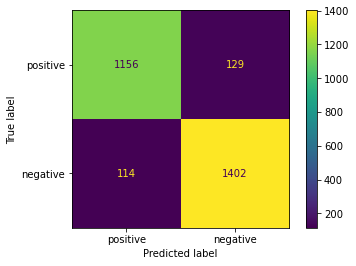

In [34]:
# classification report
print(classification_report(y_test, y_pred_cv))

thisscore = []

# f1_score
f1score = f1_score(y_test, y_pred_cv, average=None)
thisscore.extend(f1score)

# accuracy score
accuracy = accuracy_score(y_test, y_pred_cv)
thisscore.append(accuracy)
print("Accuracy Score: " + str(accuracy))

allmodels.append(thisscore)

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred_cv)
cmd = ConfusionMatrixDisplay(cm, display_labels=['positive','negative'])
cmd.plot()

### Gradient boosting classifier with Count Vectorizer 

In [35]:
# fit term frequency matrix to naive bayes model

gb.fit(x_train_cv, y_train)
y_pred_cv = gb.predict(x_test_cv)

print(list(y_test[:10]))
print(list(y_pred_cv[:10]))

['positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative']
['positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative']


C:\Users\zoe\AppData\Local\Temp/ipykernel_35656/267207232.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(list(y_test[:10]))


              precision    recall  f1-score   support

    negative       0.88      0.80      0.84      1285
    positive       0.84      0.91      0.87      1516

    accuracy                           0.86      2801
   macro avg       0.86      0.85      0.86      2801
weighted avg       0.86      0.86      0.86      2801

Accuracy Score: 0.8579078900392717


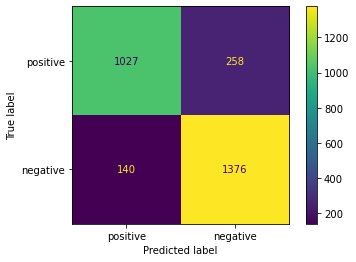

In [36]:
# classification report
print(classification_report(y_test, y_pred_cv))

thisscore = []

# f1_score
f1score = f1_score(y_test, y_pred_cv, average=None)
thisscore.extend(f1score)

# accuracy score
accuracy = accuracy_score(y_test, y_pred_cv)
thisscore.append(accuracy)
print("Accuracy Score: " + str(accuracy))

allmodels.append(thisscore)

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred_cv)
cmd = ConfusionMatrixDisplay(cm, display_labels=['positive','negative'])
cmd.plot()

### logistic regression with TF-IDF 

In [37]:
# fit TF-IDF matrix on logistic regression model

lr.fit(x_train_tfidf, y_train)
y_pred_tfidf = lr.predict(x_test_tfidf)

print(list(y_test[:10]))
print(list(y_pred_tfidf[:10]))

['positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative']
['positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative']


C:\Users\zoe\AppData\Local\Temp/ipykernel_35656/1652826021.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(list(y_test[:10]))


              precision    recall  f1-score   support

    negative       0.92      0.90      0.91      1285
    positive       0.92      0.93      0.92      1516

    accuracy                           0.92      2801
   macro avg       0.92      0.91      0.92      2801
weighted avg       0.92      0.92      0.92      2801

Accuracy Score: 0.9161013923598714


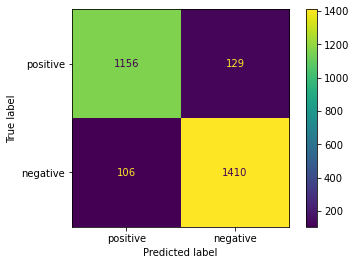

In [38]:
# classification report
print(classification_report(y_test, y_pred_tfidf))

thisscore = []

# f1_score
f1score = f1_score(y_test, y_pred_tfidf, average=None)
thisscore.extend(f1score)

# accuracy score
accuracy = accuracy_score(y_test, y_pred_tfidf)
thisscore.append(accuracy)
print("Accuracy Score: " + str(accuracy))

allmodels.append(thisscore)

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred_tfidf)
cmd = ConfusionMatrixDisplay(cm, display_labels=['positive','negative'])
cmd.plot()

This model has the highest accuracy of 0.916 (3.s.f).


### Gradient boosting classifier with TF-IDF 

In [39]:
# fit TF-IDF matrix on naive bayes model

gb.fit(x_train_tfidf, y_train)
y_pred_tfidf = gb.predict(x_test_tfidf)

print(list(y_test[:10]))
print(list(y_pred_tfidf[:10]))

['positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative']
['positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative']


C:\Users\zoe\AppData\Local\Temp/ipykernel_35656/2375682494.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(list(y_test[:10]))


              precision    recall  f1-score   support

    negative       0.88      0.82      0.85      1285
    positive       0.86      0.91      0.88      1516

    accuracy                           0.87      2801
   macro avg       0.87      0.86      0.87      2801
weighted avg       0.87      0.87      0.87      2801

Accuracy Score: 0.8668332738307747


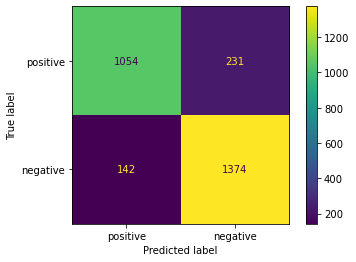

In [40]:
# classification report
print(classification_report(y_test, y_pred_tfidf))

thisscore = []

# f1_score
f1score = f1_score(y_test, y_pred_tfidf, average=None)
thisscore.extend(f1score)

# accuracy score
accuracy = accuracy_score(y_test, y_pred_tfidf)
thisscore.append(accuracy)
print("Accuracy Score: " + str(accuracy))

allmodels.append(thisscore)

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred_tfidf)
cmd = ConfusionMatrixDisplay(cm, display_labels=['positive','negative'])
cmd.plot()

In [41]:
modelnames = ['Logistic regression with Count Vectorizer', 'Gradient boosting classifier with Count Vectorizer',  
              'Logistic regression with TF-IDF', 'Gradient boosting classifier with TF-IDF']

modelscores = ['Negative f1 score' ,'Positive f1 score' , 'Accuracy']


modeldf = pd.DataFrame(allmodels, index=modelnames, columns=modelscores)
modeldfsorted = modeldf.sort_values(by='Accuracy', ascending=False)
modeldfsorted

,Negative f1 score,Positive f1 score,Accuracy
Logistic regression with TF-IDF,0.907735,0.923077,0.916101
Logistic regression with Count Vectorizer,0.904892,0.920249,0.913245
Gradient boosting classifier with TF-IDF,0.849657,0.880487,0.866833
Gradient boosting classifier with Count Vectorizer,0.837684,0.873651,0.857908


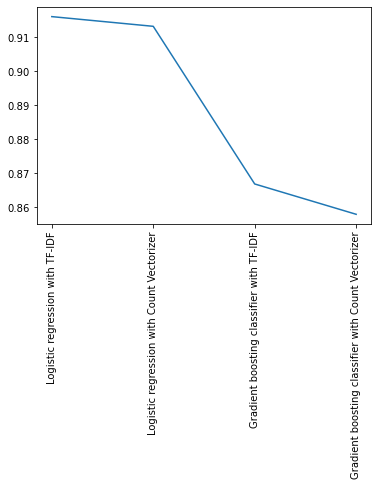

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.xticks(rotation=90)
plt.plot(modeldfsorted.index, modeldfsorted['Accuracy'])
plt.show()

# Feature selection on best model

In [43]:
feature_importances = zip( list(lr.coef_[0]), list(tfid.get_feature_names()))

top = sorted(feature_importances, reverse=True)
morethan1 = []
for i in top:
    if i[0]>1:
        morethan1.append(i)
        
morethan1

[(5.598092653676463, 'love'),
 (5.497089600610323, 'great'),
 (4.677907016696249, 'best'),
 (4.474315627255853, 'amazing'),
 (4.20101645501522, 'fun'),
 (2.9685438669612103, 'favorite'),
 (2.9006960493150036, 'awesome'),
 (2.5711921730745133, 'loved'),
 (2.498298017850355, 'wonderful'),
 (2.4405851750104106, 'disneyland'),
 (2.398708421949068, 'definitely'),
 (2.375356453451602, 'lot'),
 (2.369931114362316, 'blast'),
 (2.254184208030605, 'bring'),
 (2.1494571118505226, 'place'),
 (2.0679966663453895, 'time'),
 (1.9772772665110194, 'magical'),
 (1.9304890248671087, 'good'),
 (1.8945222669101294, 'great time'),
 (1.8917679125495879, 'perfect'),
 (1.8687771877626538, 'tip'),
 (1.8264966882854208, 'sure'),
 (1.7649282868699114, 'memory'),
 (1.762085558949299, 'nice'),
 (1.6939829819045853, 'fantastic'),
 (1.6845022849667413, 'clean'),
 (1.669854933929427, 'enjoyed'),
 (1.6198599687867938, 'plan'),
 (1.6112099301596687, 'yes'),
 (1.5672217303377407, 'age'),
 (1.563278554732266, 'holiday'),


In [44]:
values = list(zip(*morethan1))[0]
featurenames = list(zip(*morethan1))[1]

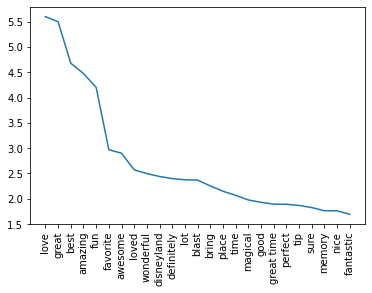

In [45]:
import seaborn as sns

# plot line chart
sns.lineplot(x=featurenames[:25], y=values[:25])
plt.xticks(rotation='90')
plt.show()


The words with highest weight in predicting sentiment are all positive words, which can explain why the model is better at predicting positive sentiment. This is because the model has more positive training data, hence it can identify 'positive' reviews, and 'non positive' reviews, instead of 'negative' reviews.

In [46]:
x_fs = tfid.transform(x).toarray()

In [47]:
dfx_fs = pd.DataFrame(x_fs, columns = tfid.get_feature_names())
dfx_fs.tail()

,aaa,aback,abc,ability,able,able access,able afford,able attraction,able book,able bring,...,yup,zero,zero star,zipper,zippity,zocalo,zocalo restaurante,zombie,zone,zoo
9329,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9330,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9331,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9332,0.0,0.0,0.0,0.0,0.076644,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
filteredtfidf = dfx_fs.filter(items=featurenames)
lrtfidf = filteredtfidf.to_numpy()

In [49]:
x= lrtfidf
y= df['sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [50]:
# fit TF-IDF matrix on logistic regression model

lr.fit(x_train, y_train)
y_pred_tfidf = lr.predict(x_test)

              precision    recall  f1-score   support

    negative       0.79      0.82      0.81      1285
    positive       0.85      0.82      0.83      1516

    accuracy                           0.82      2801
   macro avg       0.82      0.82      0.82      2801
weighted avg       0.82      0.82      0.82      2801

Accuracy Score: 0.8218493395215994


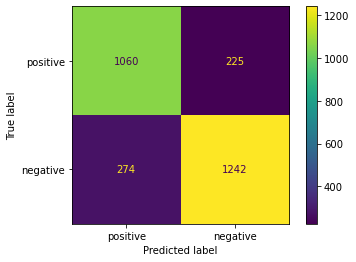

In [51]:
# classification report
print(classification_report(y_test, y_pred_tfidf))

# accuracy score
accuracy = accuracy_score(y_test, y_pred_tfidf)
print("Accuracy Score: " + str(accuracy))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred_tfidf)
cmd = ConfusionMatrixDisplay(cm, display_labels=['positive','negative'])
cmd.plot()

After only keeping the features that have a feature importance of more than 1.0, the accuracy of the model decreased significantly.
The new accuracy score is 0.822 (3.s.f), 82.2%.
This could be due to reducing the feature set too much, which results in a very vauge training dataset.

Hence, the model with more features regardless of feature importances has a higher accuracy.

# Perform k-fold cross validation on best model

In [52]:
from sklearn.model_selection import cross_val_score, KFold

x= tfid.transform(df['words_review']).toarray()
y= df['sentiment']

lr.fit(x_train_tfidf, y_train)

kfold = KFold(n_splits=12, random_state=123, shuffle=True)
score = cross_val_score(lr, x, y, cv=kfold, scoring='accuracy').mean()

print('After performing k-fold cross validation, accuracy score of logistic regression model is', score)

After performing k-fold cross validation, accuracy score of logistic regression model is 0.9139712150637599


The accuracy decreased after performing k-fold cross validation. This could be a result of overfitting as more data is used as compared to previously in the best model.

# Conclusion

The best performing model is Logistic regression with TF-IDF. It has the highest accuracy of 0.916 (3.s.f), 91.6% accurate.
The negative and positive f1 score is also quite balanced, where there is only a difference of 0.0155 (3.s.f). This can be explained by the sampling of positive values previously.

Both logistic regression and gradient boosting classifier performed better with TF-IDF feature set. This proved that TF-IDF is a better representation of features in this corpus


After removing top 25 occuring words for before performing TF-IDF, accuracy of the best model decreased by 1.1% to 0.905 (3.s.f), 90.5%. Hence, I did not utilise this technique.
Feature selection and k-fold cross validation also resulted in a decreased accuracy score.


A sentiment analysis model can help in ChatBot responses to customer feedback. The ChatBot can respond to a positive or negative feedback appropriately, and address customer concerns without the need for human intervention.
- Improves productivity as it frees up employees to do more valuable work.
- Increases customer satisfaction and customer engagment as their queries are answered fast and efficiently.
